In [442]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sn

In [443]:
# Read in the data from the data folder
credit = pd.read_csv("C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/Project 3/german_credit_data.csv")
credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


## EDA

In [444]:
# Check the number of rows and columns in the data
credit.shape

(1000, 10)

In [445]:
#finding out columns name
credit.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [446]:
# Check the type of data stored in each column
credit.dtypes
# We have 4 numerical type columns

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [447]:
#finding out datatype of each column
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [448]:
# Checking for missing values
credit.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

#### Onservation
* There are 183 missing values in Saving accounts column
* There are 394 missing values in Checking account column

### Handling missing values with mode


In [449]:
df1 = credit.copy()

In [450]:
df1.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [451]:
mode_S = df1['Saving accounts'].mode()[0]
df1['Saving accounts'].fillna(mode_S, inplace=True)

In [452]:
df1.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [453]:
mode_C = df1['Checking account'].mode()[0]
df1['Checking account'].fillna(mode_C, inplace=True)

In [454]:
df1.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


### Handling missing values by filling "unknown" in place of missing value

In [455]:
#replace missing value with unnown
credit= credit.fillna('unknown')

In [456]:
credit.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

* We can see that all the values are replaced by unknown and there are no missing values anymore

In [457]:
credit.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,unknown,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,unknown,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,unknown,unknown,9055,36,education,good
6,53,male,2,own,quite rich,unknown,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,unknown,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


* We can see that all the values are replaced by unknown

In [458]:
# See the distribution of our target features
credit.value_counts("Risk")

Risk
good    700
bad     300
dtype: int64

* Not a 50-50 split in data. Semi-imabalanced column

#### Some simple visualisations to explore data

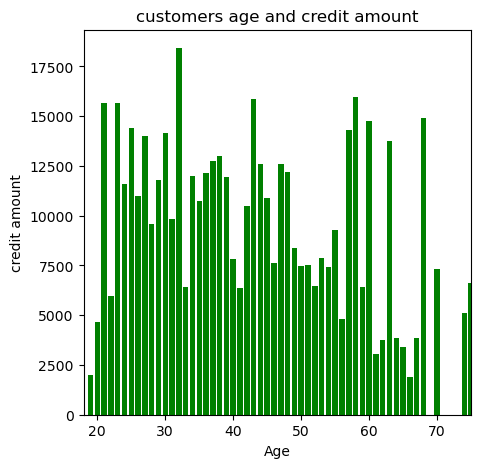

In [461]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(5,5))
plt.bar(credit["Age"],credit["Credit amount"],color="green")
plt.xlabel("Age")
plt.ylabel("credit amount")
plt.xlim(18,75)
plt.title("customers age and credit amount")
plt.show()

* We can see that people with age from 20 to 40 have more credit amount

<AxesSubplot:xlabel='Purpose', ylabel='count'>

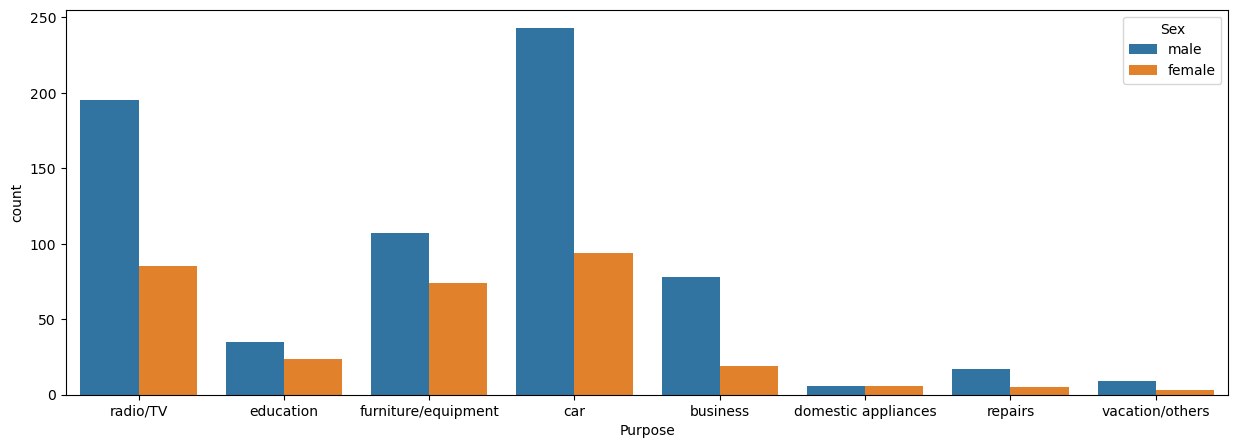

In [465]:
#distribution of loan purpose with Gender
plt.figure(figsize=(15,5))
sns.countplot(x="Purpose",data=credit,hue="Sex")

* We can see that men took more loans than women.

In [420]:
# Looking at the correlation matrix 
credit.corr()

,Age,Job,Credit amount,Duration
Age,1.000000,0.015673,0.032716,-0.036136
Job,0.015673,1.000000,0.285385,0.210910
Credit amount,0.032716,0.285385,1.000000,0.624984
Duration,-0.036136,0.210910,0.624984,1.000000


<AxesSubplot:xlabel='Housing', ylabel='count'>

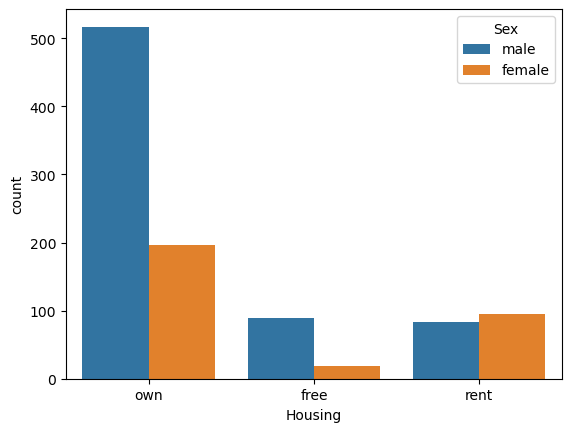

In [467]:
sns.countplot(x="Housing",data=credit,hue="Sex") # maximum loan applicants are male with on housing

* We can see that maximum loan applicants are male with on housing

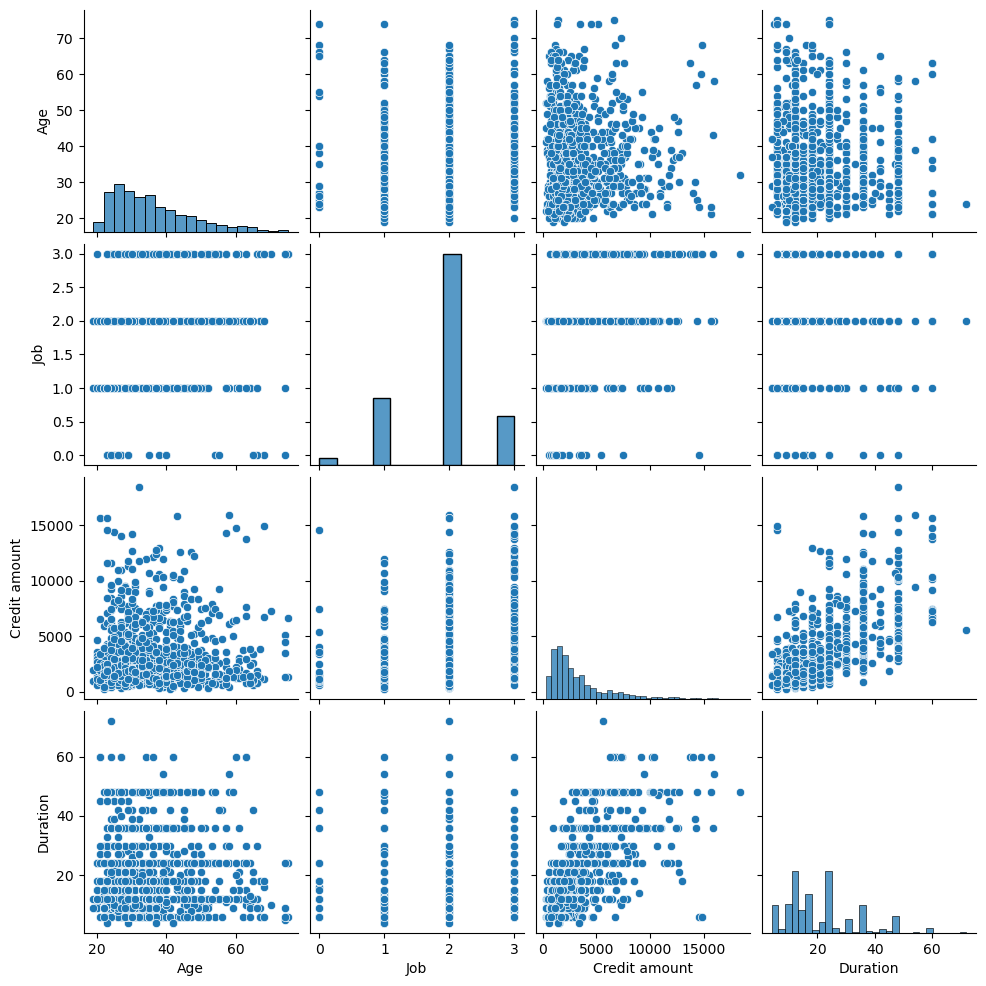

In [468]:
# pairplot 
sns.pairplot(credit)

## One hot encoding for categorical variables

In [469]:
credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,unknown,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,unknown,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [422]:
#importing library
from sklearn.preprocessing import OneHotEncoder

In [470]:
categorical_features = ['Sex', 'Housing','Saving accounts', 'Checking account', 'Purpose']

In [471]:
# create a OneHotEncoder object
encoder = OneHotEncoder()

# fit and transform the encoder on the categorical columns
encoded_cols = encoder.fit_transform(credit[['Sex', 'Housing','Saving accounts', 'Checking account', 'Purpose']])

## convert the encoded columns to a Pandas DataFrame
df_encoded = pd.DataFrame(encoded_cols.toarray(), columns=encoder.get_feature_names_out(['Sex', 'Housing','Saving accounts', 'Checking account', 'Purpose']))

# concatenate the encoded columns to the original DataFrame
credit = pd.concat([credit, df_encoded], axis=1)

In [472]:
credit.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,...,Checking account_rich,Checking account_unknown,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,male,2,own,unknown,little,1169,6,radio/TV,good,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,49,male,1,own,little,unknown,2096,12,education,good,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,53,male,2,free,little,little,4870,24,car,bad,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,35,male,1,free,unknown,unknown,9055,36,education,good,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,53,male,2,own,quite rich,unknown,2835,24,furniture/equipment,good,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,35,male,3,rent,little,moderate,6948,36,car,good,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,61,male,1,own,rich,unknown,3059,12,radio/TV,good,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,28,male,3,own,little,moderate,5234,30,car,bad,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


* We can see that all the categorical columns are now OneHotEncoded

In [473]:
# encoding target variable "Risk"
credit['Risk']=np.where(credit['Risk']=='bad',0,1)

In [474]:
credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,...,Checking account_rich,Checking account_unknown,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,male,2,own,unknown,little,1169,6,radio/TV,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,22,female,2,own,little,moderate,5951,48,radio/TV,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,49,male,1,own,little,unknown,2096,12,education,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,45,male,2,free,little,little,7882,42,furniture/equipment,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,53,male,2,free,little,little,4870,24,car,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Histogram and  Log Transformation

In [475]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

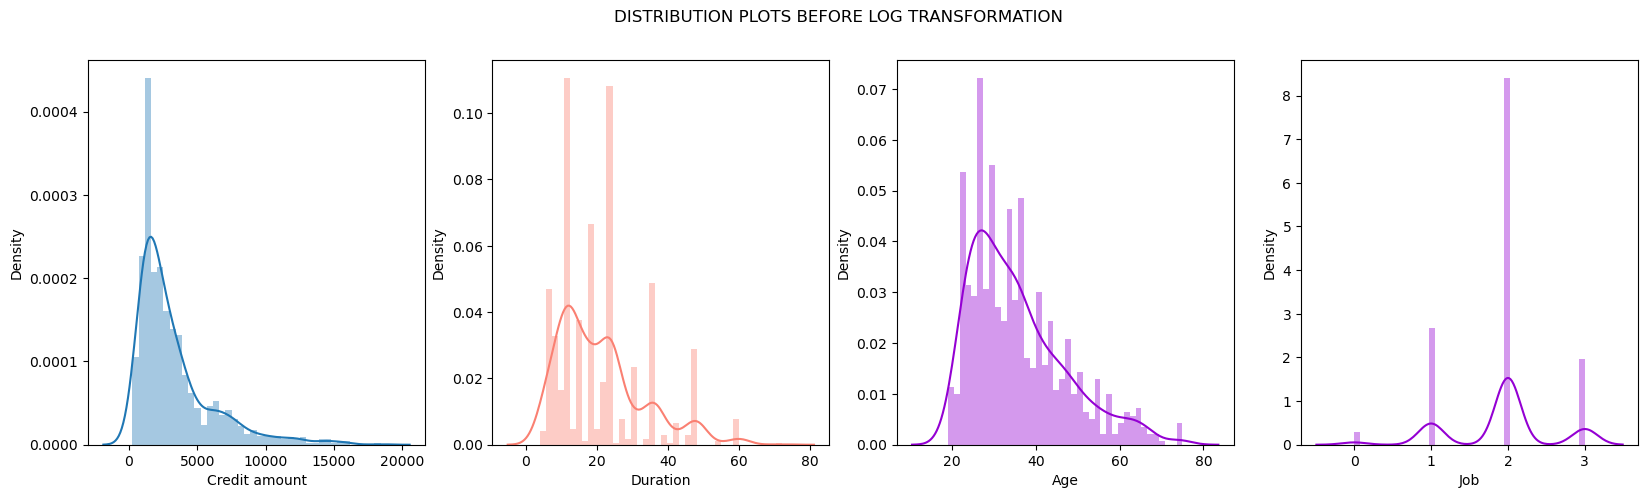

In [483]:
# plotting histograms of numerical columns
fig, ax = plt.subplots(1,4,figsize=(20,5))
plt.suptitle('DISTRIBUTION PLOTS BEFORE LOG TRANSFORMATION')
sns.distplot(credit['Credit amount'], bins=40, ax=ax[0]);
sns.distplot(credit['Duration'], bins=40, ax=ax[1], color='salmon');
sns.distplot(credit['Age'], bins=40, ax=ax[2], color='darkviolet');
sns.distplot(credit['Job'], bins=40, ax=ax[3], color='darkviolet');

* We can see that there is skewness toward right in column "credit amount" , "Duration" and "Age"
* In next step I will be log transforming these columns

In [484]:
#Applying log transformation 
credit["Credit amount"] = np.log(credit["Credit amount"])
credit["Duration"] = np.log(credit["Duration"])
credit["Age"] = np.log(credit["Age"])

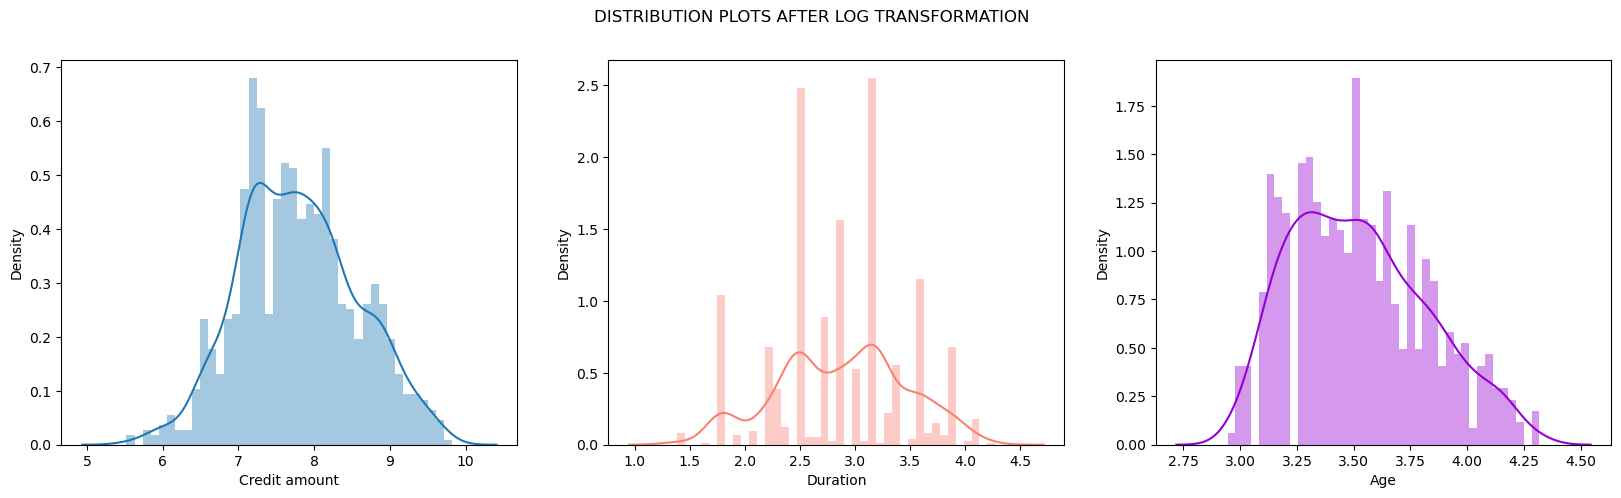

In [485]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
plt.suptitle('DISTRIBUTION PLOTS AFTER LOG TRANSFORMATION')
sns.distplot(credit['Credit amount'], bins=40, ax=ax[0]);
sns.distplot(credit['Duration'], bins=40, ax=ax[1], color='salmon');
sns.distplot(credit['Age'], bins=40, ax=ax[2], color='darkviolet');

* We can see that now these numerical columns looks normally distributed 

In [492]:
credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,...,Checking account_rich,Checking account_unknown,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,4.204693,male,2,own,unknown,little,7.063904,1.791759,radio/TV,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3.091042,female,2,own,little,moderate,8.691315,3.871201,radio/TV,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.891820,male,1,own,little,unknown,7.647786,2.484907,education,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3.806662,male,2,free,little,little,8.972337,3.737670,furniture/equipment,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,3.970292,male,2,free,little,little,8.490849,3.178054,car,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Scaling

In [493]:
# taking out numerical columns
X = credit[['Age', 'Job', 'Credit amount', 'Duration', 'Risk']]
y = credit['Risk']

In [494]:
X.head()

,Age,Job,Credit amount,Duration,Risk
0,4.204693,2,7.063904,1.791759,1
1,3.091042,2,8.691315,3.871201,0
2,3.891820,1,7.647786,2.484907,1
3,3.806662,2,8.972337,3.737670,1
4,3.970292,2,8.490849,3.178054,0


In [495]:
# using standard scaler for scaling
from sklearn.preprocessing import StandardScaler
scaled1 = StandardScaler().fit_transform(X)

scaled_X = pd.DataFrame(scaled1, columns=X.columns)

scaled_X.head()


,Age,Job,Credit amount,Duration,Risk
0,2.271006,0.146949,-0.933901,-1.864869,0.654654
1,-1.446152,0.146949,1.163046,1.708369,-1.527525
2,1.226696,-1.383771,-0.181559,-0.673790,0.654654
3,0.942455,0.146949,1.525148,1.478913,0.654654
4,1.488620,0.146949,0.904743,0.517289,-1.527525


* We can see that our numerical columns are scaled 

In [496]:
pd.DataFrame(scaled_X).describe().head(3)

,Age,Job,Credit amount,Duration,Risk
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.106226e-15,1.167400e-16,2.892131e-16,-3.730349e-17,-4.529710e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00


###  KMeans Clustering and Elbow Method
#### Choosing only numerical columns

In [504]:
#importing libraries
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [505]:
clusters=range(1,11)
meandist=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(scaled_X)
    clusassign=model.predict(scaled_X)
    meandist.append(sum(np.min(cdist(scaled_X, model.cluster_centers_, 'euclidean'), axis=1),scaled_X.shape[0]))

C:\Users\Surya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

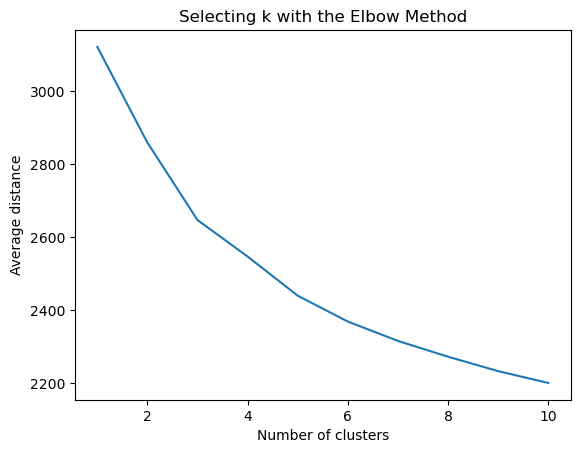

In [506]:
# display the data
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')

* We can see from the elbow method plot 3 is coming out to be the optimal number of clusters 
* So we will be 3 as optimal clusters for further steps

### Taking optimum number of clusters and visualizing it using PCA

In [440]:
# Interpret 3 cluster solution
mode2Cluster = KMeans(n_clusters=3)
mode2Cluster.fit(scaled_X)
preds=mode2Cluster.predict(scaled_X)

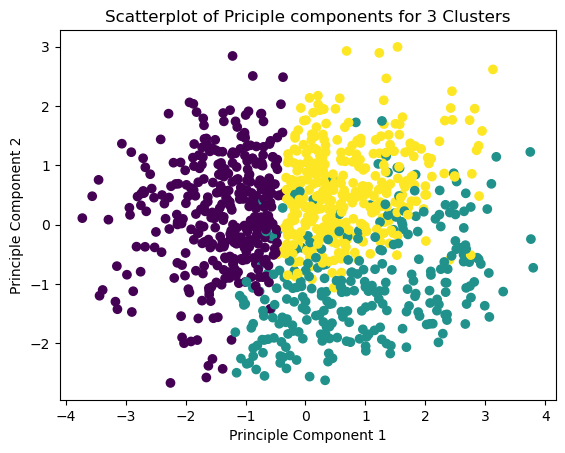

In [509]:
#taking n components = 2
pca_2 = PCA(n_components = 2)
plot_columns = pca_2.fit_transform(scaled_X)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=mode2Cluster.labels_,)
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.title('Scatterplot of Priciple components for 3 Clusters')
plt.show()

# XGBoost Classifier with 5 Fold CV on dataset without OneHotEncoded columns 

In [510]:
from sklearn.model_selection import train_test_split

In [512]:
X = scaled_X.drop(['Risk'], axis=1)
y = credit['Risk']

In [311]:
y.head()

0    1
1    0
2    1
3    1
4    0
Name: Risk, dtype: int32

In [513]:
X.head()

,Age,Job,Credit amount,Duration
0,2.271006,0.146949,-0.933901,-1.864869
1,-1.446152,0.146949,1.163046,1.708369
2,1.226696,-1.383771,-0.181559,-0.673790
3,0.942455,0.146949,1.525148,1.478913
4,1.488620,0.146949,0.904743,0.517289


In [514]:
#Splitting data into train validation and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [515]:
#writing out splitted data
X_train.to_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/Project 3/test/train_features.csv', index=False)
X_val.to_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/Project 3/test/val_features.csv', index=False)
X_test.to_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/Project 3/test/test_features.csv', index=False)

y_train.to_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/Project 3/test/train_labels.csv', index=False)
y_val.to_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/Project 3/test/val_labels.csv', index=False)
y_test.to_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/Project 3/test/test_labels.csv', index=False)


In [516]:
!pip install xgboost

In [518]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

#reading training data
tr_features = pd.read_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/Project 3/test/train_features.csv')
tr_labels = pd.read_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/Project 3/test/train_labels.csv')

In [519]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [520]:
#k-fold cv = 5
xgb = XGBClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(xgb, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

0.694 (+/-0.019) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.695 (+/-0.015) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.695 (+/-0.015) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.706 (+/-0.032) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.689 (+/-0.048) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.692 (+/-0.04) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.706 (+/-0.048) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.715 (+/-0.053) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.694 (+/-0.067) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.701 (+/-0.041) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.699 (+/-0.049) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.702 (+/-0.048) for {'learning_r

In [521]:
#printing out best estimator
cv.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

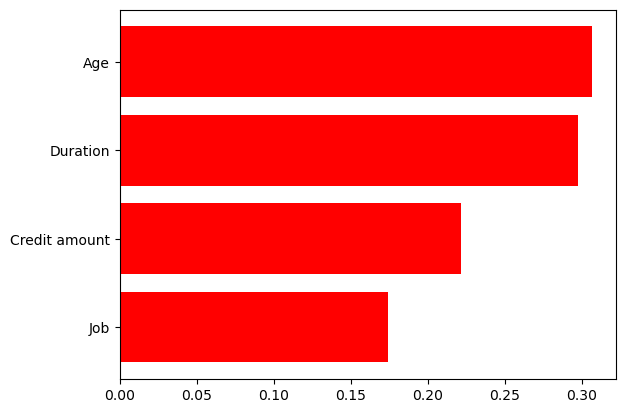

In [522]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

In [523]:
import joblib

In [524]:
#Pickling the best model using joblib
joblib.dump(cv.best_estimator_, 'C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/Project 3/test/XGB_model.pkl')

['C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/Project 3/test/XGB_model.pkl']

In [525]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

In [526]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = xgb.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('{} -- \tAccuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                     accuracy,
                                                                                     precision,
                                                                                     recall,
                                                                                     round((end - start)*1000, 1)))

In [527]:
models = {}

for mdl in ['XGB']:
    models[mdl] = joblib.load('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/Project 3/test/{}_model.pkl'.format(mdl))

In [528]:
models

{'XGB': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.01, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=3, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=500, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...)}

In [529]:
#reading validation datasets
val_features = pd.read_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/Project 3/test/val_features.csv')
val_labels = pd.read_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/Project 3/test/val_labels.csv')

In [531]:
#function to evaluate models
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average = 'weighted'), 3)
    recall = round(recall_score(labels, pred, average = 'weighted'), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [532]:
#evaluating models on validation sets
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

XGB -- Accuracy: 0.7 / Precision: 0.64 / Recall: 0.7 / Latency: 2.5ms


In [533]:
#reading test datasets
test_features = pd.read_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/Project 3/test/test_features.csv')
test_labels = pd.read_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/Project 3/test/test_labels.csv')

In [534]:
# evaluating model on test set
evaluate_model('XGB', models['XGB'], test_features, test_labels)

XGB -- Accuracy: 0.68 / Precision: 0.615 / Recall: 0.68 / Latency: 3.1ms


# XGBoost Classifier with 5 Fold CV on dataset with OneHotEncoded columns 

In [535]:
credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,...,Checking account_rich,Checking account_unknown,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,4.204693,male,2,own,unknown,little,7.063904,1.791759,radio/TV,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3.091042,female,2,own,little,moderate,8.691315,3.871201,radio/TV,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.891820,male,1,own,little,unknown,7.647786,2.484907,education,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3.806662,male,2,free,little,little,8.972337,3.737670,furniture/equipment,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,3.970292,male,2,free,little,little,8.490849,3.178054,car,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [536]:
X1 = credit.drop(['Sex','Housing','Saving accounts','Checking account','Purpose','Risk'], axis=1)
y1 = credit['Risk']

In [539]:
y1.head()

0    1
1    0
2    1
3    1
4    0
Name: Risk, dtype: int32

In [540]:
X1.head()

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,...,Checking account_rich,Checking account_unknown,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,4.204693,2,7.063904,1.791759,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3.091042,2,8.691315,3.871201,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.891820,1,7.647786,2.484907,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3.806662,2,8.972337,3.737670,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,3.970292,2,8.490849,3.178054,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Feature Scaling

In [541]:
# scaling X1
from sklearn.preprocessing import StandardScaler
scaled2 = StandardScaler().fit_transform(X1)

scaled_X1 = pd.DataFrame(scaled2, columns=X1.columns)

scaled_X1.head()


,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,...,Checking account_rich,Checking account_unknown,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,2.271006,0.146949,-0.933901,-1.864869,-0.670280,0.670280,-0.347960,0.634448,-0.466933,-1.232433,...,-0.259299,-0.806328,-0.327749,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
1,-1.446152,0.146949,1.163046,1.708369,1.491914,-1.491914,-0.347960,0.634448,-0.466933,0.811403,...,-0.259299,-0.806328,-0.327749,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
2,1.226696,-1.383771,-0.181559,-0.673790,-0.670280,0.670280,-0.347960,0.634448,-0.466933,0.811403,...,-0.259299,1.240190,-0.327749,-0.712949,-0.110208,3.993639,-0.470108,-0.623610,-0.149983,-0.110208
3,0.942455,0.146949,1.525148,1.478913,-0.670280,0.670280,2.873893,-1.576173,-0.466933,0.811403,...,-0.259299,-0.806328,-0.327749,-0.712949,-0.110208,-0.250398,2.127172,-0.623610,-0.149983,-0.110208
4,1.488620,0.146949,0.904743,0.517289,-0.670280,0.670280,2.873893,-1.576173,-0.466933,0.811403,...,-0.259299,-0.806328,-0.327749,1.402626,-0.110208,-0.250398,-0.470108,-0.623610,-0.149983,-0.110208


In [542]:
#Splitting data into train validation and test set
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [543]:
#writing out splitted data
X_train.to_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/Project 3/test1/train_features.csv', index=False)
X_val.to_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/Project 3/test1/val_features.csv', index=False)
X_test.to_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/Project 3/test1/test_features.csv', index=False)

y_train.to_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/Project 3/test1/train_labels.csv', index=False)
y_val.to_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/Project 3/test1/val_labels.csv', index=False)
y_test.to_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/Project 3/test1/test_labels.csv', index=False)


In [544]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

#reading training data
tr_features = pd.read_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/Project 3/test1/train_features.csv')
tr_labels = pd.read_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/Project 3/test1/train_labels.csv')

In [545]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [546]:
#k-fold cv = 5
xgb = XGBClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(xgb, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}

0.699 (+/-0.005) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.699 (+/-0.005) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.699 (+/-0.015) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.699 (+/-0.031) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.694 (+/-0.056) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.696 (+/-0.044) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.72 (+/-0.045) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.724 (+/-0.029) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.706 (+/-0.07) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.715 (+/-0.045) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.734 (+/-0.031) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.744 (+/-0.018) for {'learning_ra

In [547]:
#printing out best estimator
cv.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [549]:
import joblib

In [550]:
#Pickling the best model using joblib
joblib.dump(cv.best_estimator_, 'C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/Project 3/test1/XGB_model.pkl')

['C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/Project 3/test1/XGB_model.pkl']

In [551]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

In [552]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = xgb.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('{} -- \tAccuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                     accuracy,
                                                                                     precision,
                                                                                     recall,
                                                                                     round((end - start)*1000, 1)))

In [553]:
models = {}

for mdl in ['XGB']:
    models[mdl] = joblib.load('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/Project 3/test1/{}_model.pkl'.format(mdl))

In [554]:
models

{'XGB': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.01, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=5, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=500, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...)}

In [555]:
#reading validation datasets
val_features = pd.read_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/Project 3/test1/val_features.csv')
val_labels = pd.read_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/Project 3/test1/val_labels.csv')

In [556]:
#function to evaluate models
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average = 'weighted'), 3)
    recall = round(recall_score(labels, pred, average = 'weighted'), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [557]:
#evaluating models on validation sets
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

XGB -- Accuracy: 0.73 / Precision: 0.703 / Recall: 0.73 / Latency: 3.4ms


In [558]:
#reading test datasets
test_features = pd.read_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/Project 3/test1/test_features.csv')
test_labels = pd.read_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/Project 3/test1/test_labels.csv')

In [559]:
# evaluating model on test set
evaluate_model('XGB', models['XGB'], test_features, test_labels)

XGB -- Accuracy: 0.77 / Precision: 0.76 / Recall: 0.77 / Latency: 3.8ms


# Observation 
* When performing XGB classifier without the OneHotEncoded data/columns --- Accuracy: 0.68 / Precision: 0.615 / Recall: 0.68 / Latency: 3.1ms

*  When performing XGB classifier with the OneHotEncoded data/columns --- Accuracy: 0.77 / Precision: 0.76 / Recall: 0.77 / Latency: 3.8ms

* We can see that with one hot encoded columns/ more data our classifier is able to give better accuracy results